In [3]:
!GIT_SSL_NO_VERIFY=1  pip install git+https://github.com/TimeSynth/TimeSynth.git

  Cloning https://github.com/TimeSynth/TimeSynth.git to /tmp/pip-req-build-8ujpoq6l
  Running command git clone --filter=blob:none --quiet https://github.com/TimeSynth/TimeSynth.git /tmp/pip-req-build-8ujpoq6l
  Resolved https://github.com/TimeSynth/TimeSynth.git to commit e50cdb9015d415adf46a4eae161a087c5c378564
  Preparing metadata (setup.py) ... done
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 MB 24.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 22.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 20.2 MB/s eta 0:00:00
  DEPRECATION: Building 'timesynth' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by se

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import timesynth as ts
from timesynth import TimeSampler, TimeSeries
from typing import Any, Dict, List

In [168]:
def generate_timeseries(n_samples=300, frequency=0.25, amplitude=1.0, noise_std=0.3, cycles=False):
    signal = ts.signals.Sinusoidal(frequency=frequency)
    signal.amplitude = amplitude

    if cycles:
        stop_time = n_samples / frequency
    elif not cycles:
        stop_time = n_samples
        
    time_sampler = ts.TimeSampler(stop_time=stop_time)
    regular_time_samples = time_sampler.sample_regular_time(num_points=n_samples)

    noise = ts.noise.GaussianNoise(std=noise_std)
    timeseries = ts.TimeSeries(signal_generator=signal, noise_generator=noise)
    samples, signals, errors = timeseries.sample(regular_time_samples)

    return regular_time_samples, samples, signals, errors

In [169]:
def plot_timeseries(times_series: List[Dict[str, Any]], plot_errors=False) -> None:
    plt.figure(figsize=(10, 6))

    for i, series in enumerate(times_series):
        samples = np.array(series['samples'], dtype=float)
        signals = np.array(series['signals'], dtype=float)
        errors = series.get('errors', None)

        if isinstance(errors, str):
            print(f"Skipping 'errors' for Signal {i+1} because it is a string: {errors}")
            errors = None
        elif errors is not None:
            try:
                errors = np.array(errors, dtype=float)
            except Exception as e:
                print(f"Could not convert 'errors' for Signal {i+1}: {e}")
                errors = None

        plt.plot(samples, signals, label=f'Signal {i+1}')
        
        if plot_errors and errors is not None:
            plt.plot(samples, signals + errors, label=f'Signal {i+1} with Noise', linestyle='--')

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Generated Time Series Data')
    plt.legend()
    plt.grid(True)
    plt.show()

In [176]:
regular_time_samples_1, samples_1, signals_1, errors_1 = generate_timeseries(n_samples=20, amplitude=1.5, frequency=2, noise_std=0.1, cycles=True)
regular_time_samples_2, samples_2, signals_2, errors_2 = generate_timeseries(n_samples=20, amplitude=1, frequency=2, noise_std=0.1, cycles=True)

In [177]:
times_series_1 = {"samples" : regular_time_samples_1, "signals": signals_1, "errors": errors_1}
times_series_2 = {"samples" : regular_time_samples_2, "signals": signals_2, "errors": errors_2}
times_series = [times_series_1, times_series_2]

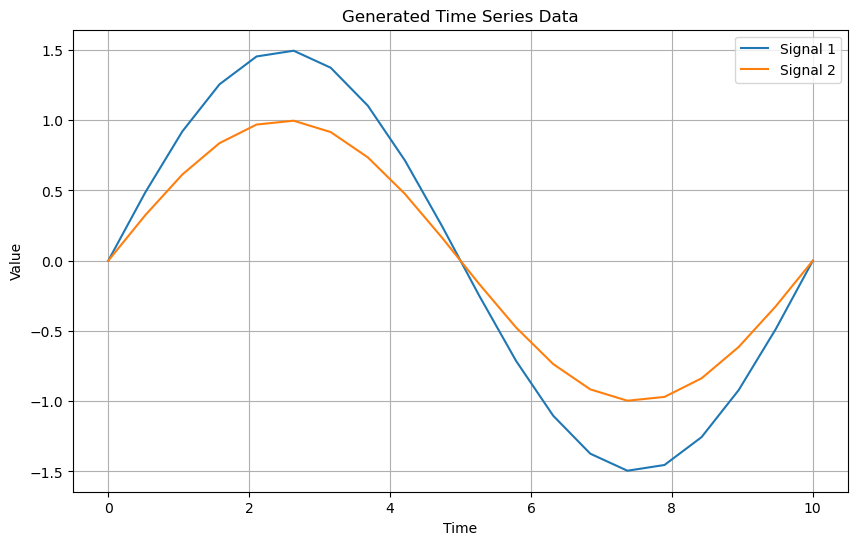

In [178]:
plot_timeseries(times_series)